# Linear Regression With Gradient Descent
Linear Regression is the art of finding relationship between two or more variables and it is a kind of supervised learning problem which uses continous value dataset. Linear regression is useful in finding the best fit line which descibes how different features are related to each other.
For more info: [Linear Regression](https://en.wikipedia.org/wiki/Linear_regression)


The code in this notebook will not use any libraries except numpy for mathematical calculations and matplotlib for graph plotting and pandas for handling data. This will give a better understanding of how machine learning algorithms works under the hood.

## Dataset 
The dataset consists of two columns 
* Number of study hours
* Test Scores

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Error function
Error function is used to calculate the cost or the error on each iteration. Here we use Mean Squared Error algorithm for calculating the error.
        $RMSE = \frac{1}{2n}\Sigma_{i=1}^{n}{({h_i -Y_i})^2}$


In [10]:
def error_function(features,labels,m,c):
    m_derived = np.sum((m*features + c - labels)*features)/len(labels)
    c_derived = np.sum((m*features + c)-labels)/len(labels)
    error = np.sum(np.square(m*features+c - labels))/(2*len(labels))
    return [m_derived,c_derived,error]

## Gradient Descent
Gradient descent is a very important parameter learning algorithm which is used to decide the value of parameters for which the cost function is minimum. The below function will perform a single step of gradient descent. 

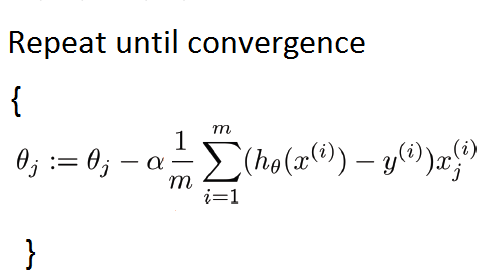

In [11]:
def  step_gradient_descent(features,labels,learning_rate,c,m):
    [derived_m,derived_c,error] = error_function(features.values.reshape(100,1),labels.values.reshape(100,1),m,c)
    m = m - learning_rate*derived_m
    c = c - learning_rate*derived_c
    return [c,m,error]
    
    

This function repeats the gradient descent step multiple times to minimize the cost function J(Q).

In [12]:
def gradient_descent_runner(features,labels,learning_rate,initial_c,initial_m,num_iterations):
    m= initial_m
    c=initial_c
    error_list=[]
    for a in range(num_iterations):
        [c,m,error] = step_gradient_descent(features,labels,learning_rate,c,m)
        error_list.append(error)
    return [c,m,error,error_list]

## Start 
Here we decide the following parameters for our linear regression Model.
* Learning rate
* initial value for out parameters
* number of iterations for the gradient descent


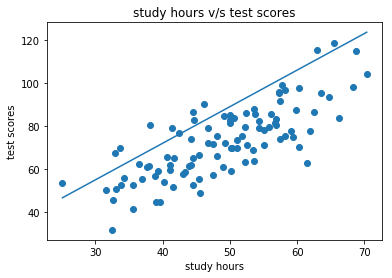

cost function is 165.78183698755504


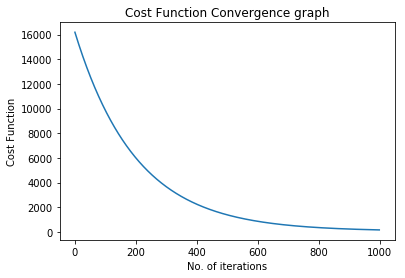

In [13]:
def run():
    points = pd.read_csv('/home/arpan/linear_regression_live/data.csv',delimiter=',',header = None,names=['study hours','test scores']).sort_values(by=['study hours'])
    learning_rate=0.000001
    initial_c = 4 
    initial_m = 5
    num_iterations = 1000
    [c,m,error,error_list]=gradient_descent_runner(points['study hours'],points['test scores'],learning_rate,initial_c,initial_m,num_iterations)
    plt.title("study hours v/s test scores")
    plt.scatter(points['study hours'],points['test scores'])
    plt.plot(points['study hours'],m*points['study hours']+c)
    plt.xlabel('study hours')
    plt.ylabel('test scores')
    plt.show()
    print("cost function is {}".format(error))
    plt.title("Cost Function Convergence graph")
    plt.plot(list(range(num_iterations)),error_list)
    plt.xlabel("No. of iterations")
    plt.ylabel("Cost Function")
    
run()
    

# Graphs 
## Study hours and test Scores
The graph shows how the test scores of students are affected by the number of study hours. The best fit line shows how well the learning algorithm performed.

## No. of Iterations V/S Cost Function
A good way according to me to check whether the algorithm is working fine is by plotting a graph between Cost function. If the cost function is decreasing, it means that the learning algorithm is working fine. You can even check the effect of learning rate on gradient descent by fine tuning it yourself.